# PASSION manager demo:

In this notebook, the manager is demonstrated. The steps that it follows are:  
    - Retrieve the satellite imagery.  
    - Segment the images into binary masks.  
    - Perform the rooftop analysis.  
    - Perform the section analysis.  

It needs as inputs:  
    - An API key.  
    - The segmentation model.  
    - The tilt distribution.  
    - The output path for the final results.  
    

This only stores the final sections results, and the rest of intermediate steps are eliminated.  

In [1]:
import passion

import pathlib
import tensorflow as tf

Segmentation Models: using `keras` framework.
Error while importing RESKit. Package is not available in Windows. Continuing with the rest of submodules...


#### Important:
Substitute with your service API key

In [2]:
API_KEY = 'YOUR_KEY'

In [3]:
output_path = pathlib.Path('F:\datasets/final')
tilt_path = pathlib.Path('F:\datasets\passion') / 'tilt_distribution.pkl'
model_path = pathlib.Path('F:\datasets\passion\models') / 'rooftop-segmentation.h5'
model = tf.keras.models.load_model(str(model_path))

In [4]:
passion.manager.analyse_region(API_KEY, output_path, model, tilt_path, bbox = ((50.77850739604879, 6.0768084397936395), (50.77514558009357, 6.081035433169415)))

Trying zoom level: 19
Map pixels from	(69374462,45063984)
To	(69376038,45065966)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.98s/it]
2it [00:07,  3.93s/it]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:18<00:00,  6.76it/s]


#### Results

Sample image of one of the sections stored in the 'sections' folder. The name of the image is linked to the section in the CSV file.

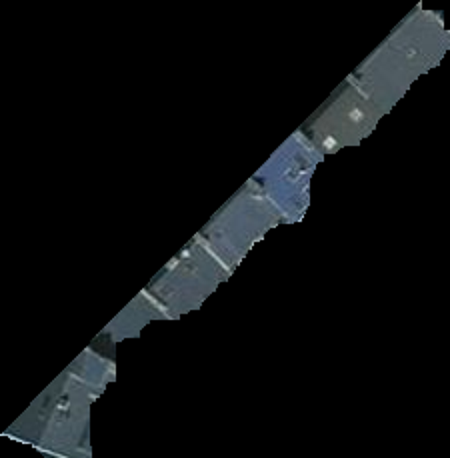

In [7]:
import PIL

paths = list((output_path / 'sections').glob('*.png'))
img = PIL.Image.open(paths[55])

img.resize((img.size[0]*2, img.size[1]*2))